In [1]:
# page56

!pip install ucimlrepo

In [2]:

from ucimlrepo import fetch_ucirepo

heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets

print("metadata=", heart_disease.metadata)
print("variables=", heart_disease.variables)
print("X.shape=", X.shape, type(X))

metadata= {'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Ste

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

csv_df = pd.read_csv('heart.csv')
csv_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [41]:
X_train, X_test = train_test_split(csv_df, test_size=0.2, random_state=42)

In [42]:
X_train.to_csv('train.csv', index=False)
X_test.to_csv('test.csv', index=False)

In [43]:
# page58

df = pd.read_csv('train.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
1,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
2,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
3,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
4,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
238,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
239,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
240,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


In [44]:
# page59

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
1,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
2,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
3,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
4,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0


In [45]:
# page60

df_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
1,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
2,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
3,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [46]:
# page61

print("train=\n", df_train.info())
print("test=\b", df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   242 non-null    int64  
 8   exang     242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    int64  
 11  ca        242 non-null    int64  
 12  thal      242 non-null    int64  
 13  target    242 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 26.6 KB
train=
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       61 non-nul

In [47]:
# page63

y = df_train['target']
X = df_train.drop(['target'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   242 non-null    int64  
 8   exang     242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    int64  
 11  ca        242 non-null    int64  
 12  thal      242 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 24.7 KB


In [49]:
y_test = df_test['target']
X_test = df_test.drop(['target'], axis=1)

In [50]:
# page65

from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X,y)
pred_lr = model_lr.predict(X_test)

print(pred_lr[:10])

[ 0.20461609  0.62932079  0.71803669  0.04394647  0.93859572  0.82919673
  0.55248505 -0.31123783 -0.12686594  0.50190798]


In [53]:
# page66

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [62]:
# page68

continuous_column = ['age','trestbps','chol','thalach','oldpeak','ca']

categorical_column = list(df_train.columns.difference(continuous_column))
categorical_column

['cp', 'exang', 'fbs', 'restecg', 'sex', 'slope', 'target', 'thal']

In [55]:
# page69

import seaborn as sns

plt.figure(figsize=(50,14))
palette = {0:'orange', 1:'yellow'}

<Figure size 5000x1400 with 0 Axes>

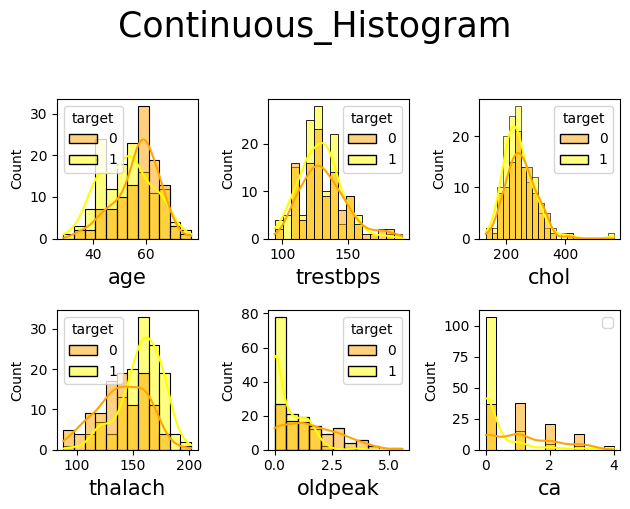

In [60]:
# page70

for i in range(len(continuous_column)):
  plt.subplot(2, 3, i+1)
  ax = sns.histplot(data=df_train, x=df_train[continuous_column].columns[i], kde=True, hue="target", palette=palette)
  ax.set_xlabel(df_train[continuous_column].columns[i], fontsize=15)

plt.suptitle('Continuous_Histogram', fontsize=25, y=1.05)
plt.tight_layout(h_pad=1.5)
plt.legend(loc='upper right')

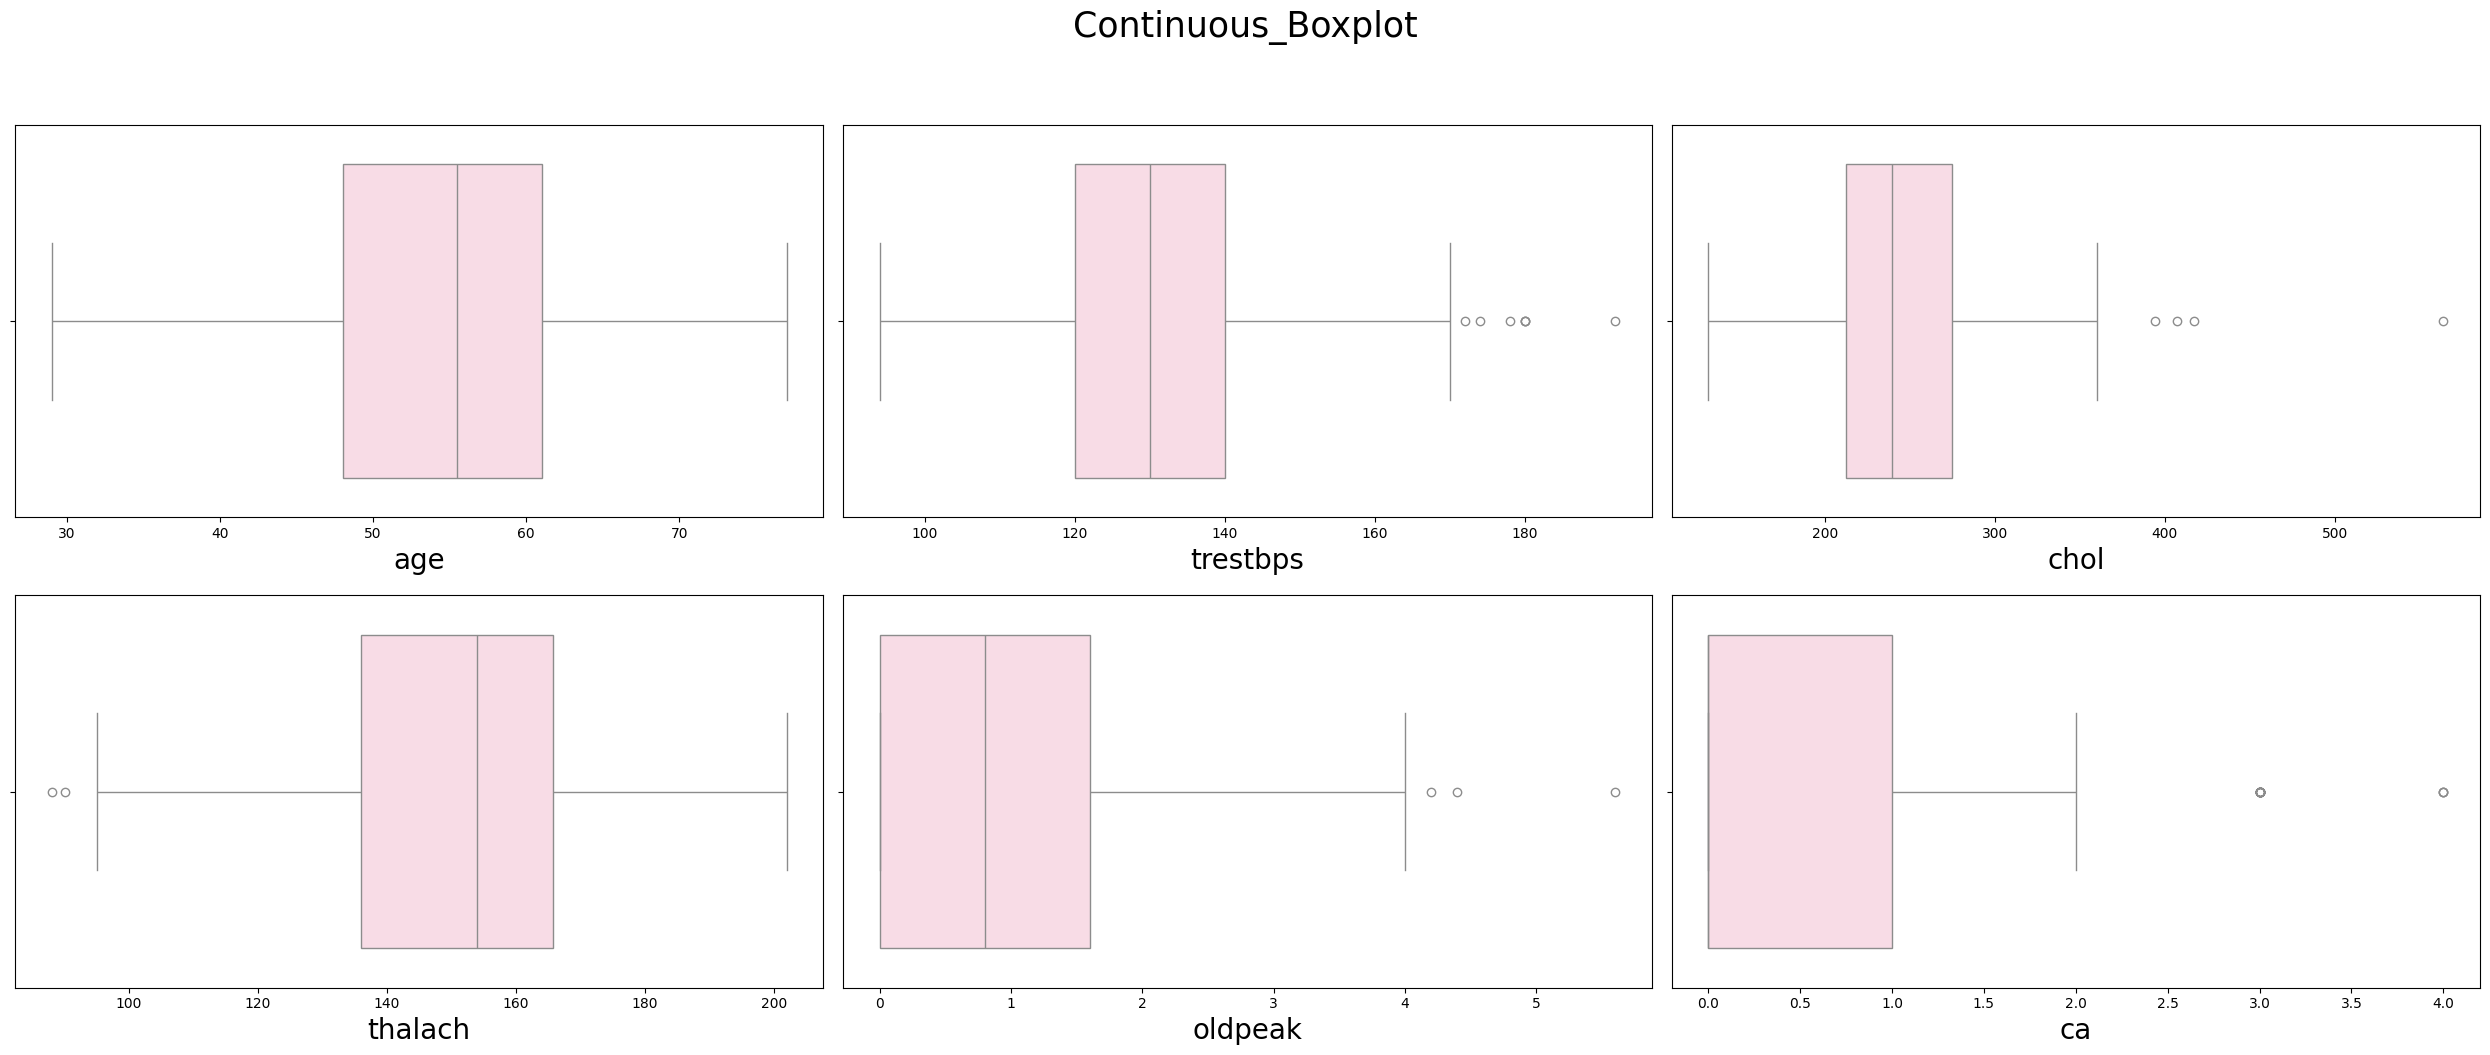

In [61]:
# page72

plt.figure(figsize=(25,10))

for i in range(len(continuous_column)):
  plt.subplot(2, 3, i+1)
  ax = sns.boxplot(data=df_train, x=df_train[continuous_column].columns[i], color="#FDD7E4")
  ax.set_xlabel(df_train[continuous_column].columns[i], fontsize=20)

plt.suptitle('Continuous_Boxplot', fontsize=25, y=1.05)
plt.tight_layout(h_pad=1.5)

Text(0.5, 0.91, 'Categorical_countplot')

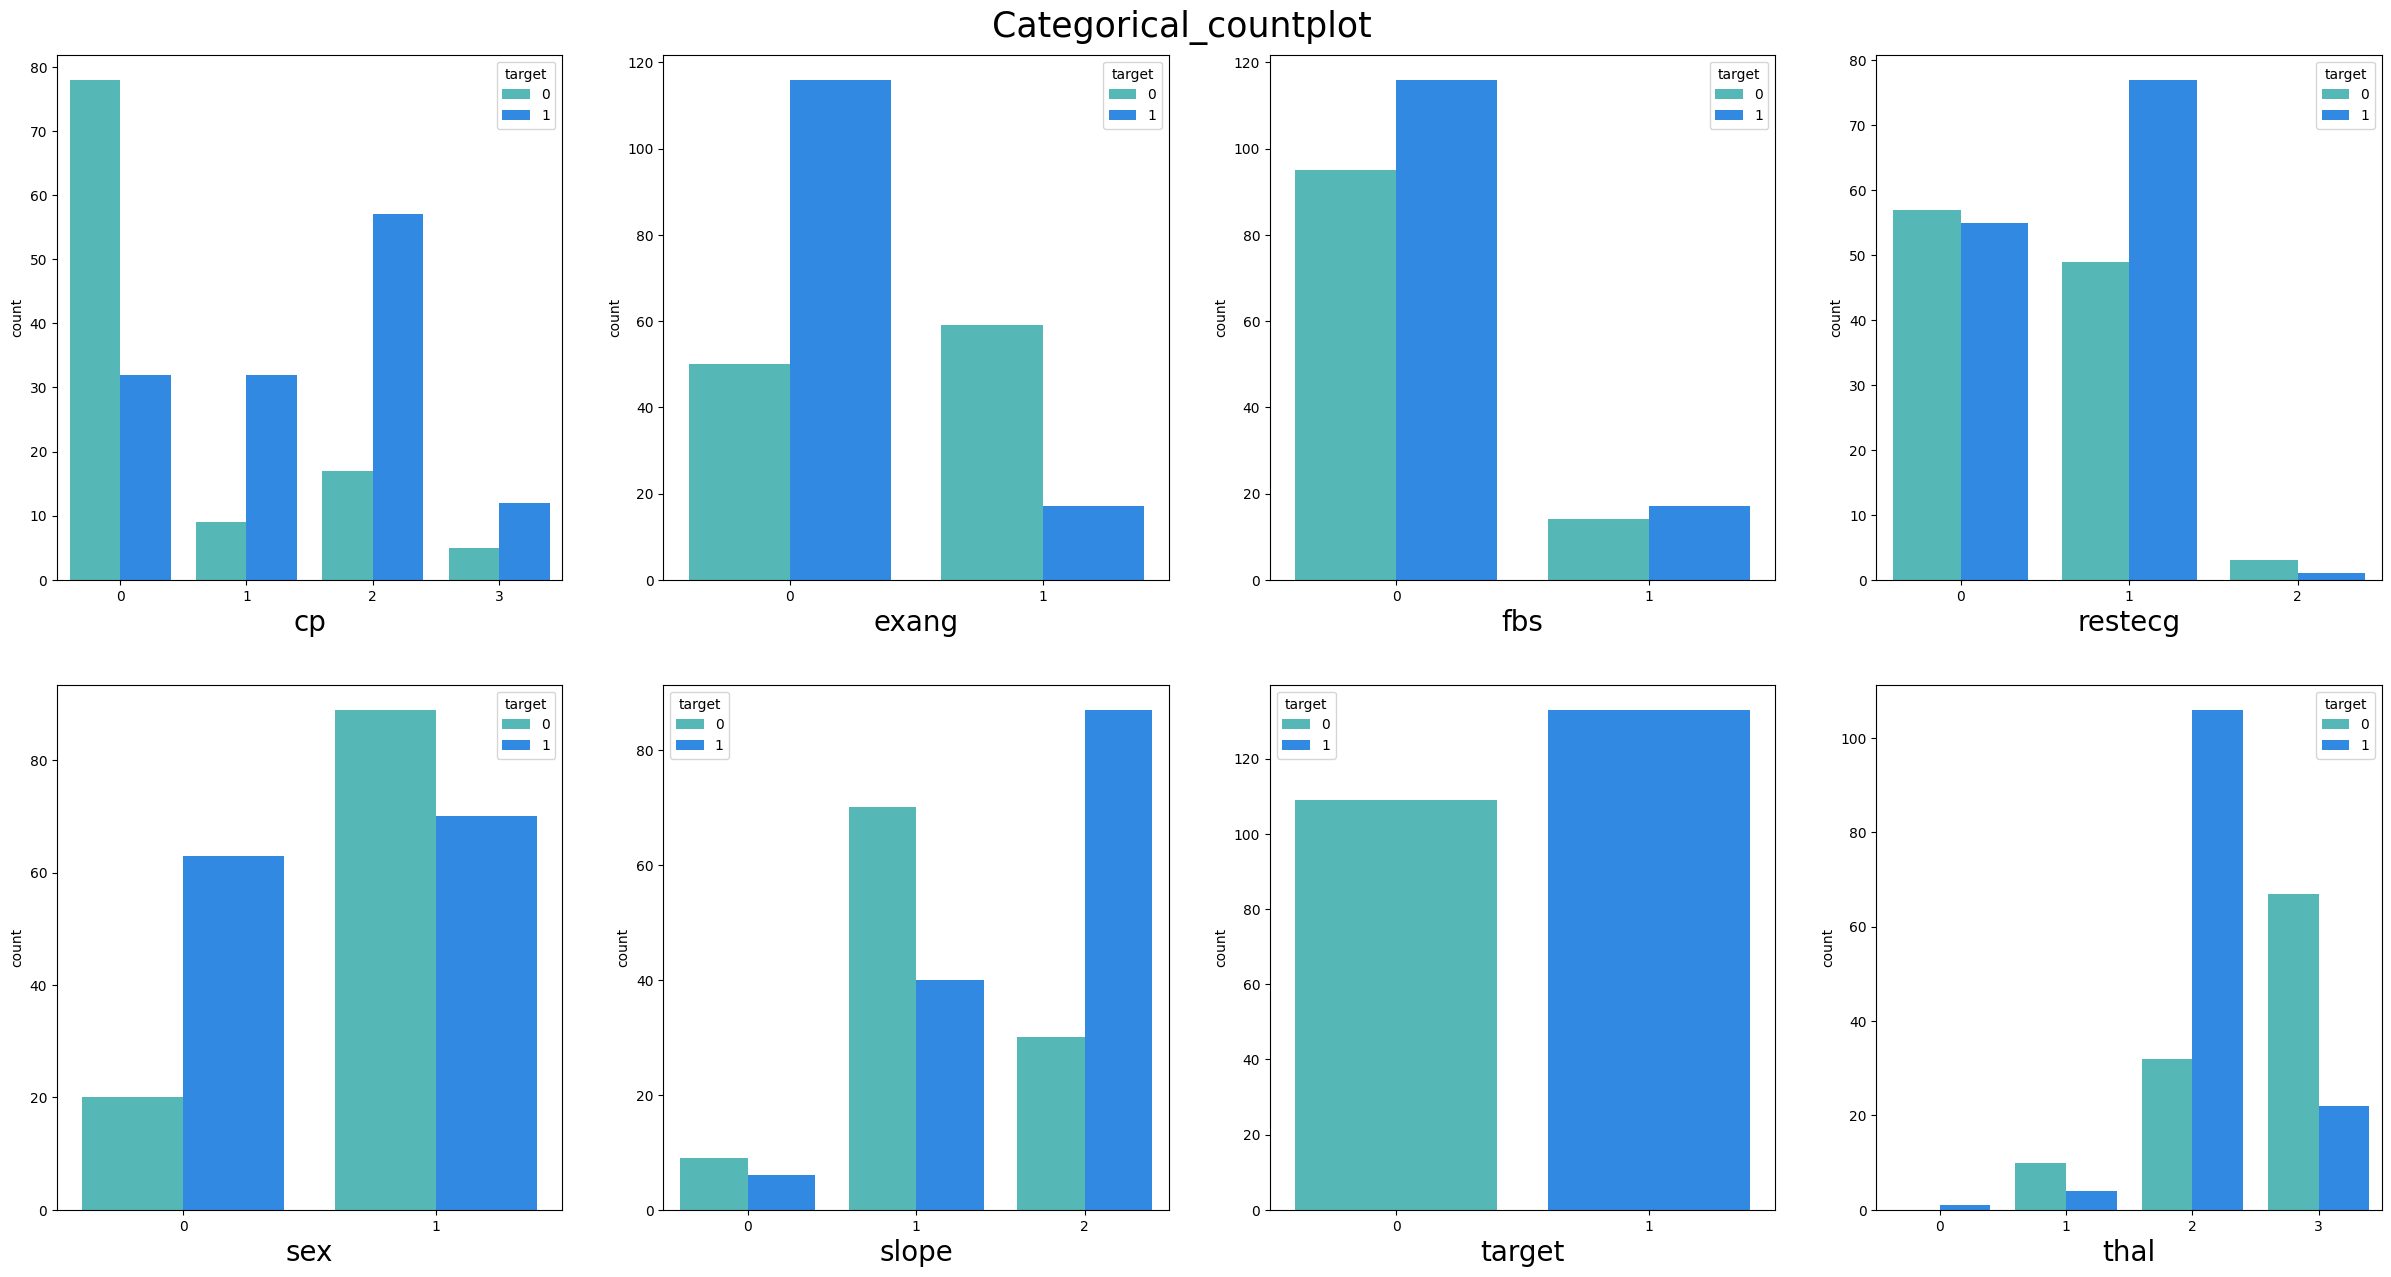

In [63]:
# page74

plt.figure(figsize=(30,15))

palette = {0:'#46C7C7',1:'#1589FF'}

for i in range(len(categorical_column)):
  plt.subplot(2, 4, i+1)
  ax = sns.countplot(data=df_train, x=df_train[categorical_column].columns[i], hue='target', palette=palette)
  ax.set_xlabel(df_train[categorical_column].columns[i], fontsize=20)

plt.suptitle('Categorical_countplot', fontsize=25, y=0.91)


In [64]:
# page76

df_train = df_train[(df_train['trestbps']<=165) & (df_train['oldpeak']<5) & (df_train['chol']<350) & (df_train['ca']<4)]

In [65]:
# page77

features = df_train.columns[1:-1] # 교재와 달리 id가 없음 age만 제외함
target = df_train.columns[-1]

X = df_train[features]
y = df_train[target]

In [66]:
# page81

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, shuffle=False)

print("X_train.shape:", X_train.shape)
print("X_valid.shape:", X_valid.shape)
print("y_train.shape:", y_train.shape)
print("y_valid.shape:", y_valid.shape)

X_train.shape: (200, 12)
X_valid.shape: (23, 12)
y_train.shape: (200,)
y_valid.shape: (23,)


In [80]:
# page84

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

predict = model.predict(df_test[features])
print(predict[:10])

df_predictions = pd.DataFrame(predict, columns=['predict'])

print(df_predictions.info())
df_submission = pd.concat([df_test['target'], df_predictions], axis=1)
#df_submission['predictaaa'] = predict
print(df_submission.info())

df_submission.to_csv("submission.csv", index=False)

[0.07 0.64 0.51 0.23 0.7  0.98 0.66 0.16 0.   0.29]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   predict  61 non-null     float64
dtypes: float64(1)
memory usage: 620.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   target   61 non-null     int64  
 1   predict  61 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB
None


In [81]:
# page85

print("continuous_column",continuous_column)
print("categorical_column",categorical_column)

continuous_column ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
categorical_column ['cp', 'exang', 'fbs', 'restecg', 'sex', 'slope', 'target', 'thal']


In [82]:
# page87

from scipy import stats

for i in range(len(categorical_column)):
  df = pd.crosstab(df_train['target'], df_train[categorical_column[i]])

  result = stats.chi2_contingency(df, correction=False)

  print(df)
  print(categorical_column[i] + "의 p-value : {:.10}".format(result[1]))
  print("\n")



cp       0   1   2   3
target                
0       71   8  16   5
1       29  31  51  12
cp의 p-value : 6.144173173e-11


exang     0   1
target         
0        48  52
1       108  15
exang의 p-value : 1.131521436e-10


fbs       0   1
target         
0        88  12
1       108  15
fbs의 p-value : 0.9645677734


restecg   0   1  2
target            
0        53  45  2
1        51  71  1
restecg의 p-value : 0.1445446407


sex      0   1
target        
0       16  84
1       57  66
sex의 p-value : 1.569820463e-06


slope   0   1   2
target           
0       7  64  29
1       6  37  80
slope의 p-value : 4.810884469e-07


target    0    1
target          
0       100    0
1         0  123
target의 p-value : 2.004595512e-50


thal    0   1   2   3
target               
0       0  10  30  60
1       1   4  99  19
thal의 p-value : 5.811538701e-13




In [84]:
# page89

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_train_scaled_mm = scaler.fit_transform(df_train[continuous_column])
column_name = df_train[continuous_column].columns + 'scaled_mm'
df = pd.DataFrame(df_train_scaled_mm, columns=column_name)

df_train = pd.concat([df_train, df], axis=1)

In [86]:
print("column_name",column_name)

column_name Index(['agescaled_mm', 'trestbpsscaled_mm', 'cholscaled_mm',
       'thalachscaled_mm', 'oldpeakscaled_mm', 'cascaled_mm'],
      dtype='object')


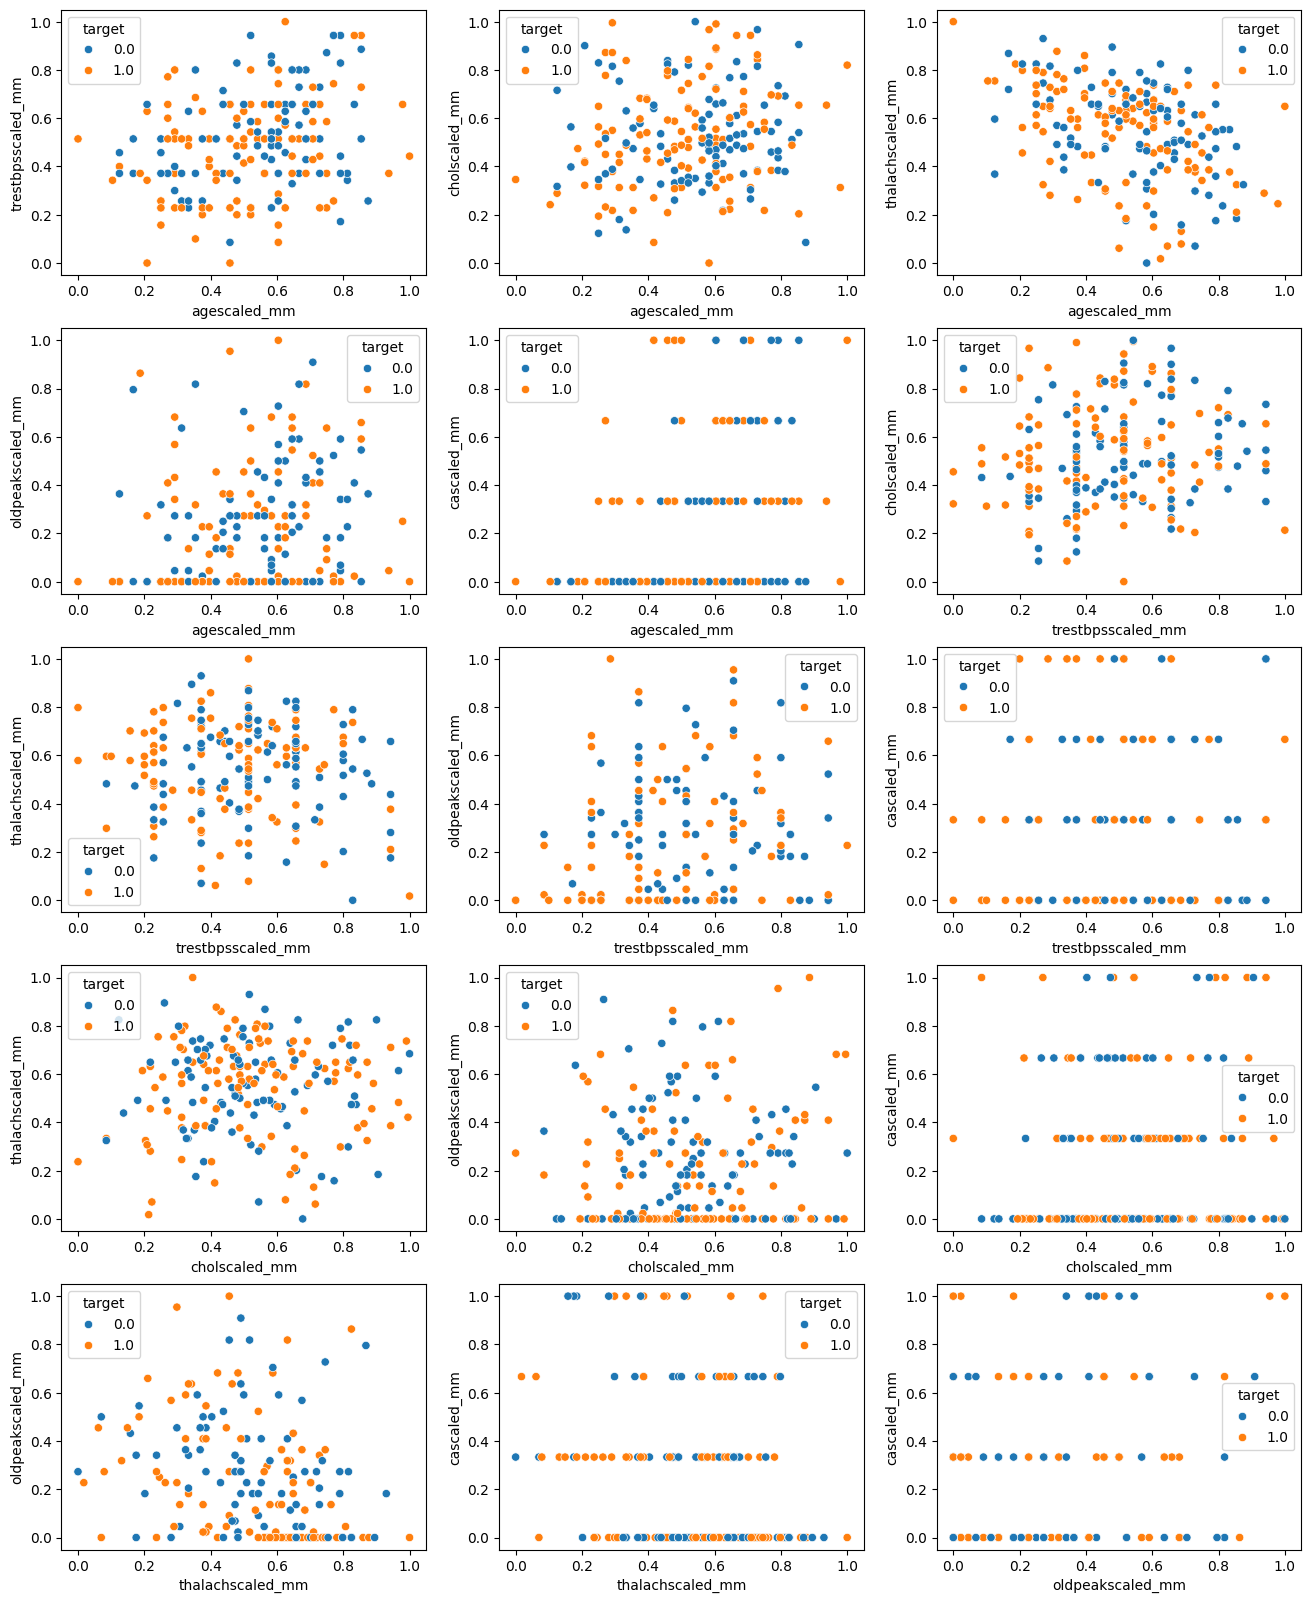

In [87]:
# page90

plt.figure(figsize=(16,20))

k = 1
for i in range(len(continuous_column)):
  for j in range(i+1, len(continuous_column)):
    plt.subplot(5,3,k)
    sns.scatterplot(data=df_train, x=column_name[i], y=column_name[j], hue='target')
    k+=1


<Axes: >

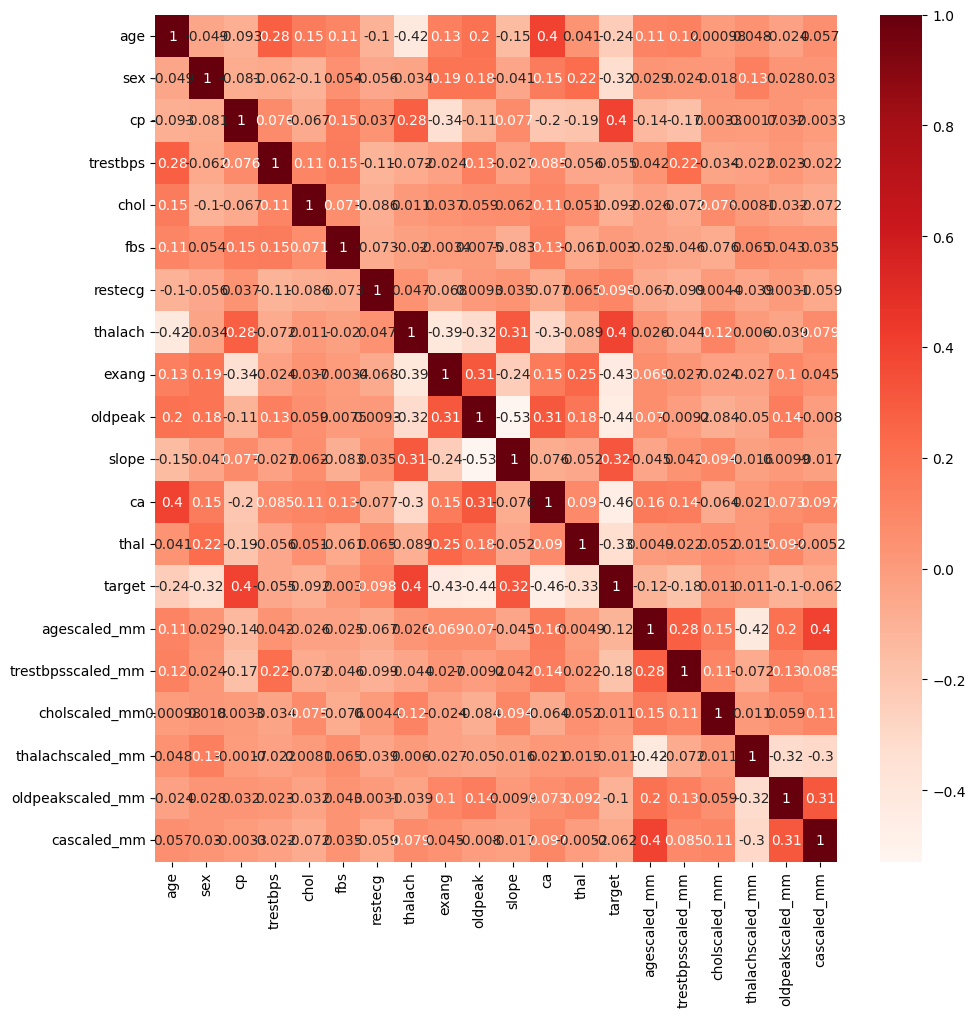

In [88]:
# page94

plt.figure(figsize=(11,11))

sns.heatmap(df_train.corr(), annot=True, cmap='Reds')

<Axes: >

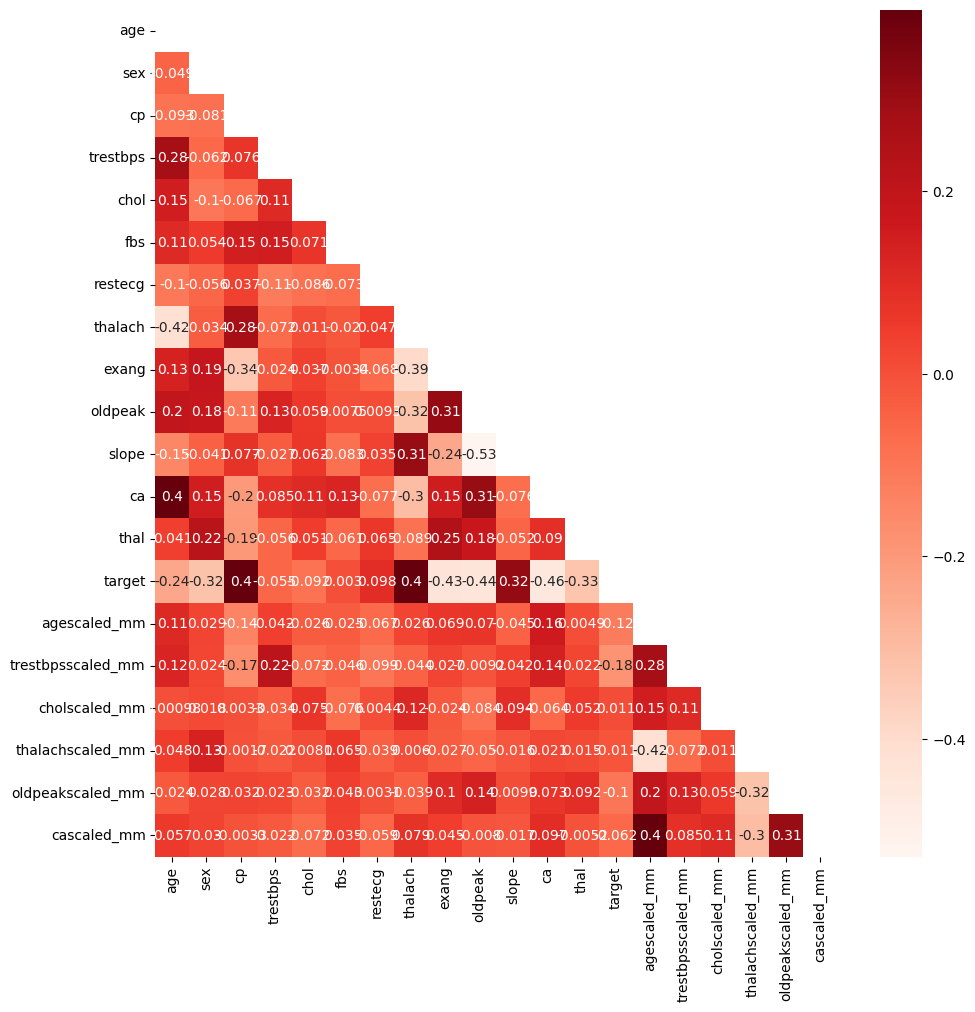

In [90]:
# page96

mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(11,11))
sns.heatmap(df_train.corr(), annot=True, mask=mask, cmap='Reds')

<Axes: xlabel='slope', ylabel='oldpeak'>

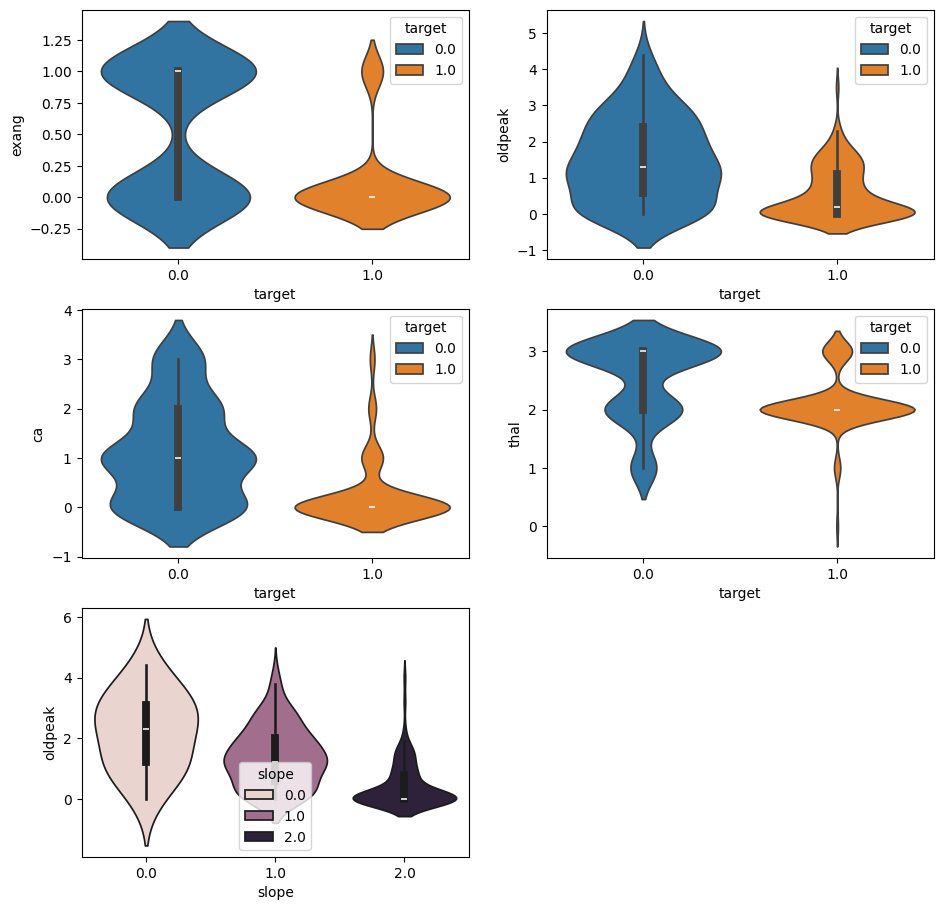

In [95]:
# page98

plt.figure(figsize=(11,11))
plt.subplot(3,2,1)
sns.violinplot(x='target',y='exang',data=df_train,hue='target')
plt.subplot(3,2,2)
sns.violinplot(x='target',y='oldpeak',data=df_train,hue='target')
plt.subplot(3,2,3)
sns.violinplot(x='target',y='ca',data=df_train,hue='target')
plt.subplot(3,2,4)
sns.violinplot(x='target',y='thal',data=df_train,hue='target')
plt.subplot(3,2,5)
sns.violinplot(x='slope',y='oldpeak',data=df_train,hue='slope')

In [101]:
# page104

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

predict = model_rf.predict(X_valid)
print(predict[:15])


[1 1 0 1 1 1 0 0 0 1 1 1 0 1 0]


In [102]:
# page107

print(list(y_valid[:15]),sep="")

comparison = list(predict == list(y_valid))
print(sum(comparison)/len(comparison))

[1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0]
0.782608695652174


In [103]:
# page110

from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

kfold = KFold(n_splits=20, random_state=1, shuffle=True)

scoring = {
    'accuracy':make_scorer(accuracy_score),
    'precision':make_scorer(precision_score),
    'recall':make_scorer(recall_score),
    'f1_score':make_scorer(f1_score),
}

result = cross_validate(model_rf, X, y, cv=kfold, scoring=scoring)


In [110]:
# page111

print(result.keys())

for key, value in result.items():
  if key != 'fit_time':
    print("{0} : {1:.4f}".format(key, value.mean()))



dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1_score'])
score_time : 0.0167
test_accuracy : 0.8250
test_precision : 0.8463
test_recall : 0.8587
test_f1_score : 0.8367


[0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


<Axes: xlabel='predict', ylabel='count'>

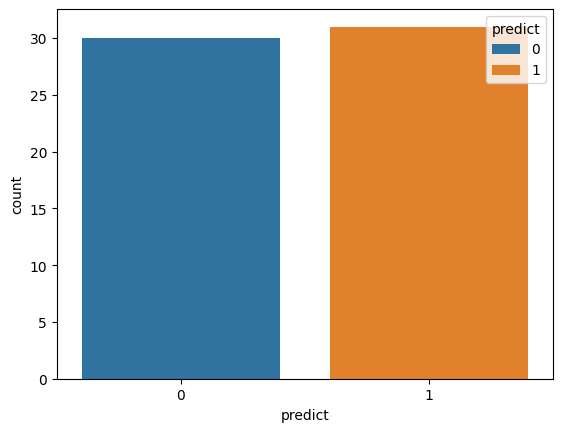

In [118]:
# page112

test_predict = model_rf.predict(df_test[features])

print(test_predict)

df_predictions = pd.DataFrame(test_predict, columns=['predict'])

sns.countplot(x='predict', data=df_predictions, hue='predict')

In [119]:

df_submission = pd.concat([df_test['target'], df_predictions], axis=1)
#df_submission['predictaaa'] = predict
print(df_submission.info())

df_submission.to_csv("submission_2.csv", index=False)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   target   61 non-null     int64
 1   predict  61 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB
None
